In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
pip install tensorflow

In [4]:
!pip install --upgrade --force-reinstall tensorflow==2.12.0

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\urllib3-1.26.4.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518827 sha256=f481e598796e09b9ce35dd01d96ed1ac8f224cd65682ae8ca5626cdd9005cb80
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\46\d9\15\d2800d4089dc4c77299ac7513c6aa1036f5491edbd2bf6ba16
Successfully built jax
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:


In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
sns.set(style='whitegrid')

In [11]:
import pandas as pd
data= pd.read_csv("heart_disease_dataset.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
X = data.drop('target',axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [15]:
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
y_pred_lr =Linear_reg.predict(X_test) 
print("LinearRegression Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2 score:", r2_score(y_test, y_pred_lr))


LinearRegression Mean Squared Error: 0.147594485200568
Linear Regression R2 score: 0.40960801060785534


In [16]:
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test,y_pred_tree))
print("Decision tree R2 Score", r2_score(y_test, y_pred_tree))

Decision Tree Mean Squared Error: 0.014634146341463415
Decision tree R2 Score 0.9414620217018846


In [17]:
from tensorflow.keras.models import Sequential

In [21]:
ann =Sequential()
ann.add(Dense(units=64, activation = 'relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(units=64, activation = 'relu'))
ann.add(Dense(units=1))

In [28]:
ann.compile(optimizer='adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
y_pred_ann = ann.predict(X_test)  # Corrected variable name
print("ANN Mean Squared Error", mean_squared_error(y_test, y_pred_ann))
print("ANN R2 score:", r2_score(y_test, y_pred_ann))

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 7.0862e-04 - mean_squared_error: 7.0862e-04 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 5.1092e-04 - mean_squared_error: 5.1092e-04 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8950e-04 - mean_squared_error: 3.8950e-04 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 3.2754e-04 - mean_squared_error: 3.2754e-04 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Ep

Epoch 50/100
21/21 [==============================] - 0s 2ms/step - loss: 5.3464e-04 - mean_squared_error: 5.3464e-04 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 51/100
21/21 [==============================] - 0s 2ms/step - loss: 3.2522e-04 - mean_squared_error: 3.2522e-04 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 52/100
21/21 [==============================] - 0s 2ms/step - loss: 4.3222e-04 - mean_squared_error: 4.3222e-04 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 53/100
21/21 [==============================] - 0s 2ms/step - loss: 4.4838e-04 - mean_squared_error: 4.4838e-04 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 54/100
21/21 [==============================] - 0s 2ms/step - loss: 5.9969e-04 - mean_squared_error: 5.9969e-04 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 55/100
21/21 [==============================] - 0s 2ms/step - loss: 7.6021e-04 - mean_squared_error: 7.6021e-04 - val_loss: 0.0274 - val_mean_sq

21/21 [==============================] - 0s 2ms/step - loss: 1.0529e-04 - mean_squared_error: 1.0529e-04 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 99/100
21/21 [==============================] - 0s 3ms/step - loss: 1.7279e-04 - mean_squared_error: 1.7279e-04 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 100/100
7/7 [==============================] - 0s 667us/step
ANN Mean Squared Error 0.02263763725120456
ANN R2 score: 0.909447296261006


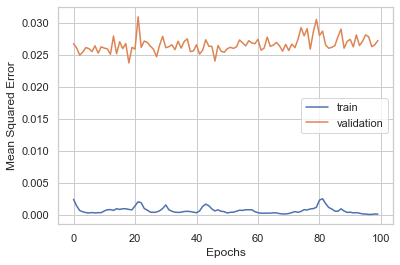

In [29]:
plt.plot(history.history['mean_squared_error'],label='train')
plt.plot(history.history['val_mean_squared_error'],label='validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()